<a href="https://colab.research.google.com/github/Youssef-S-Ahmed/Predicting-Red-Wine-Quality-Using-Python/blob/main/Predicting_Red_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

#Machine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

## Importing the dataset

In [ ]:
wine = pd.read_csv("winequality-red.csv")
df = pd.DataFrame(wine)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Counting Categorical, float, Obj
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 1
Float variables: 11


<Axes: >

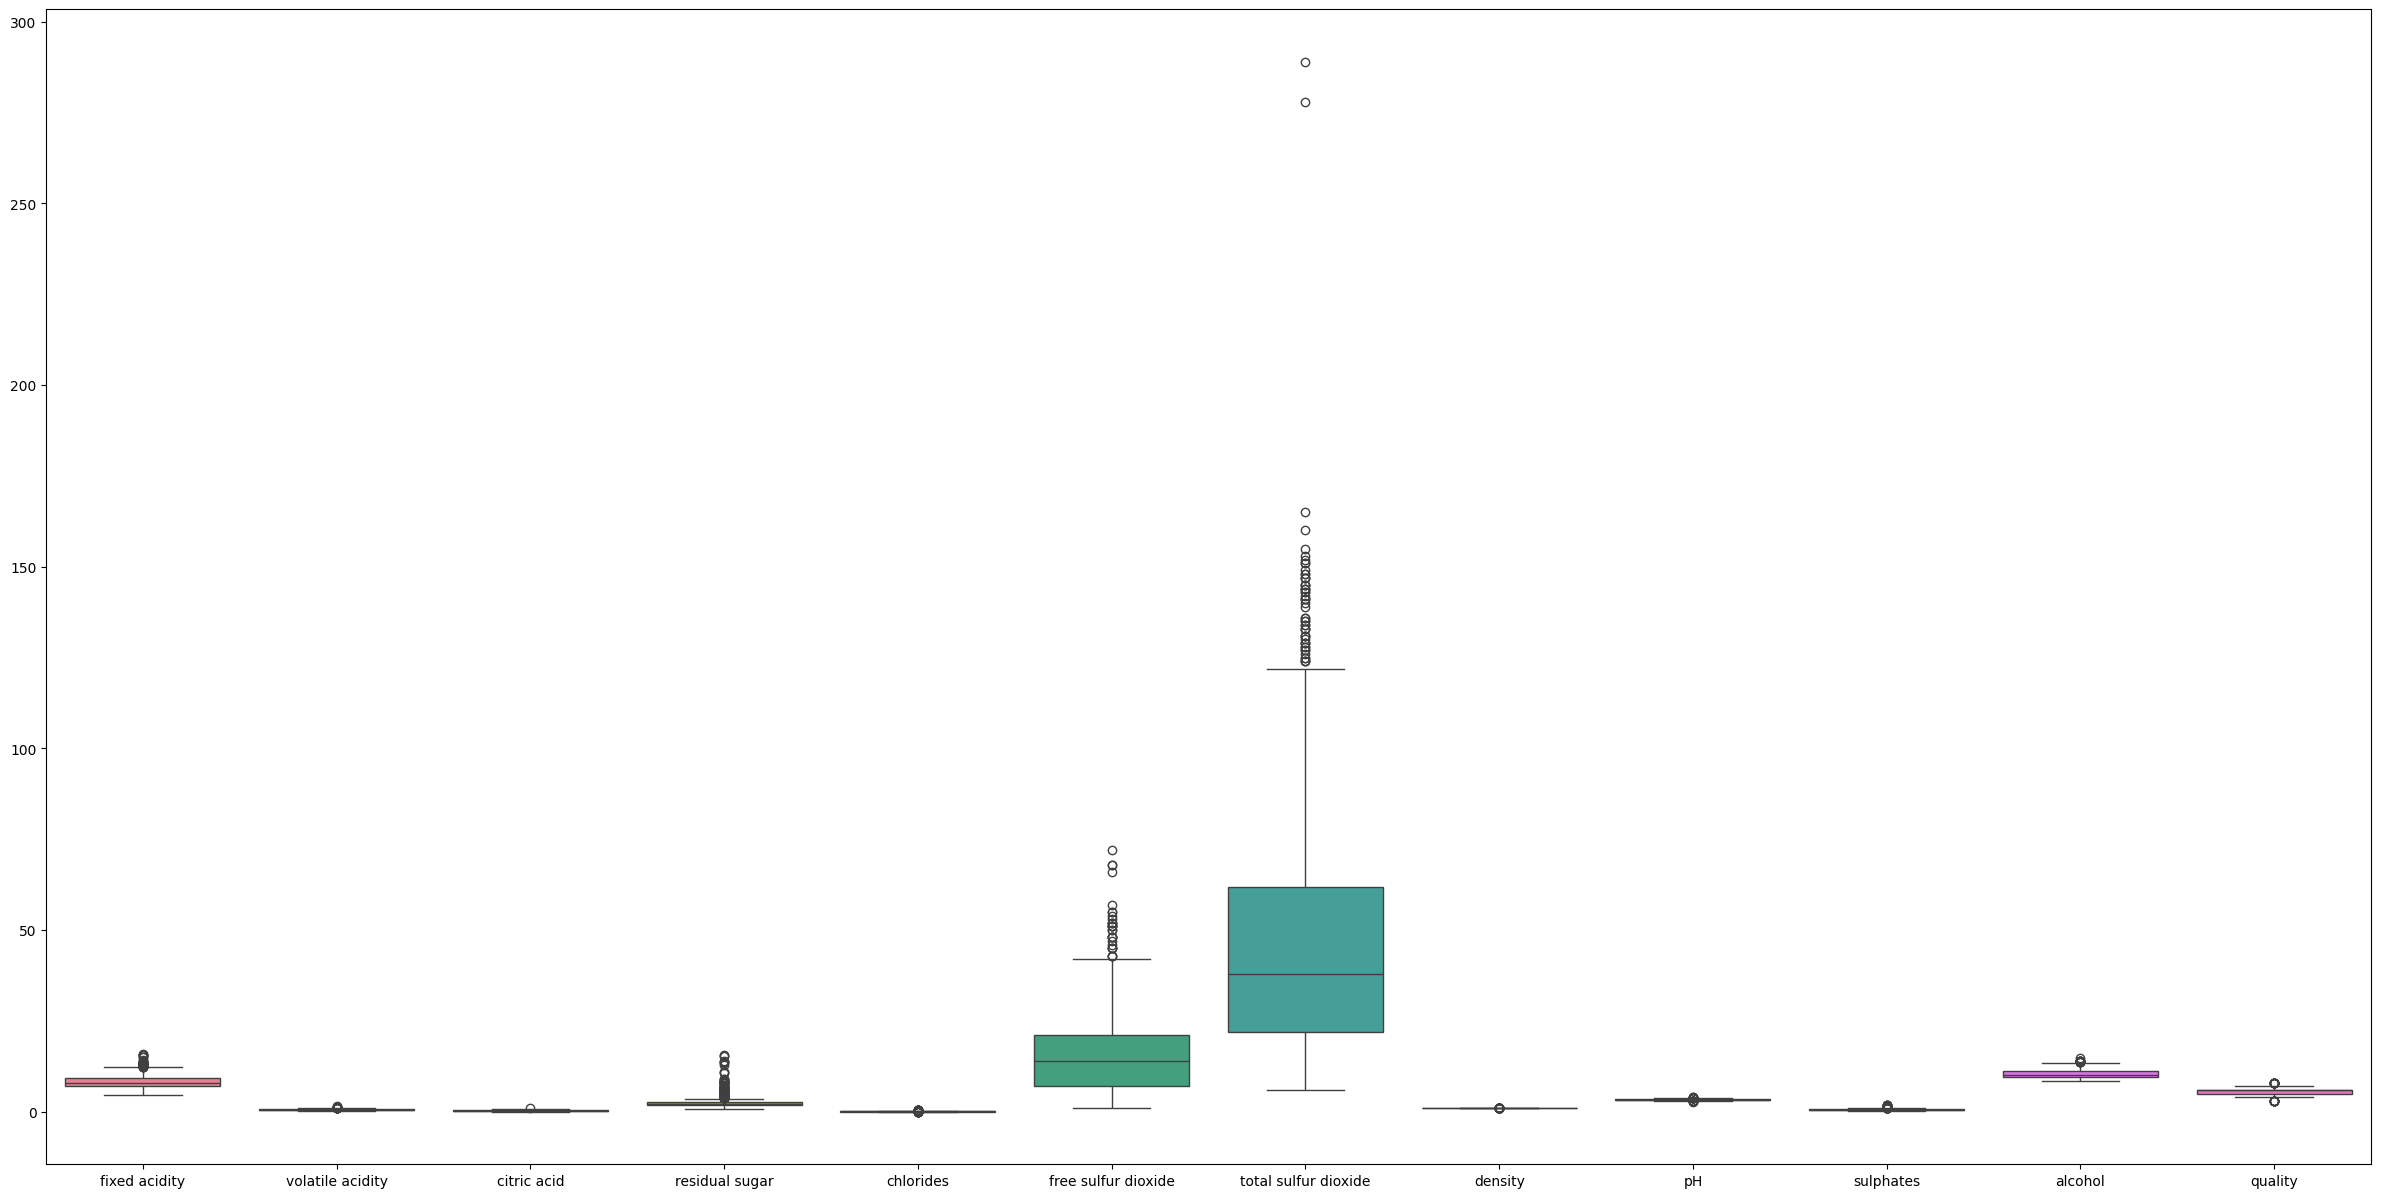

In [ ]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

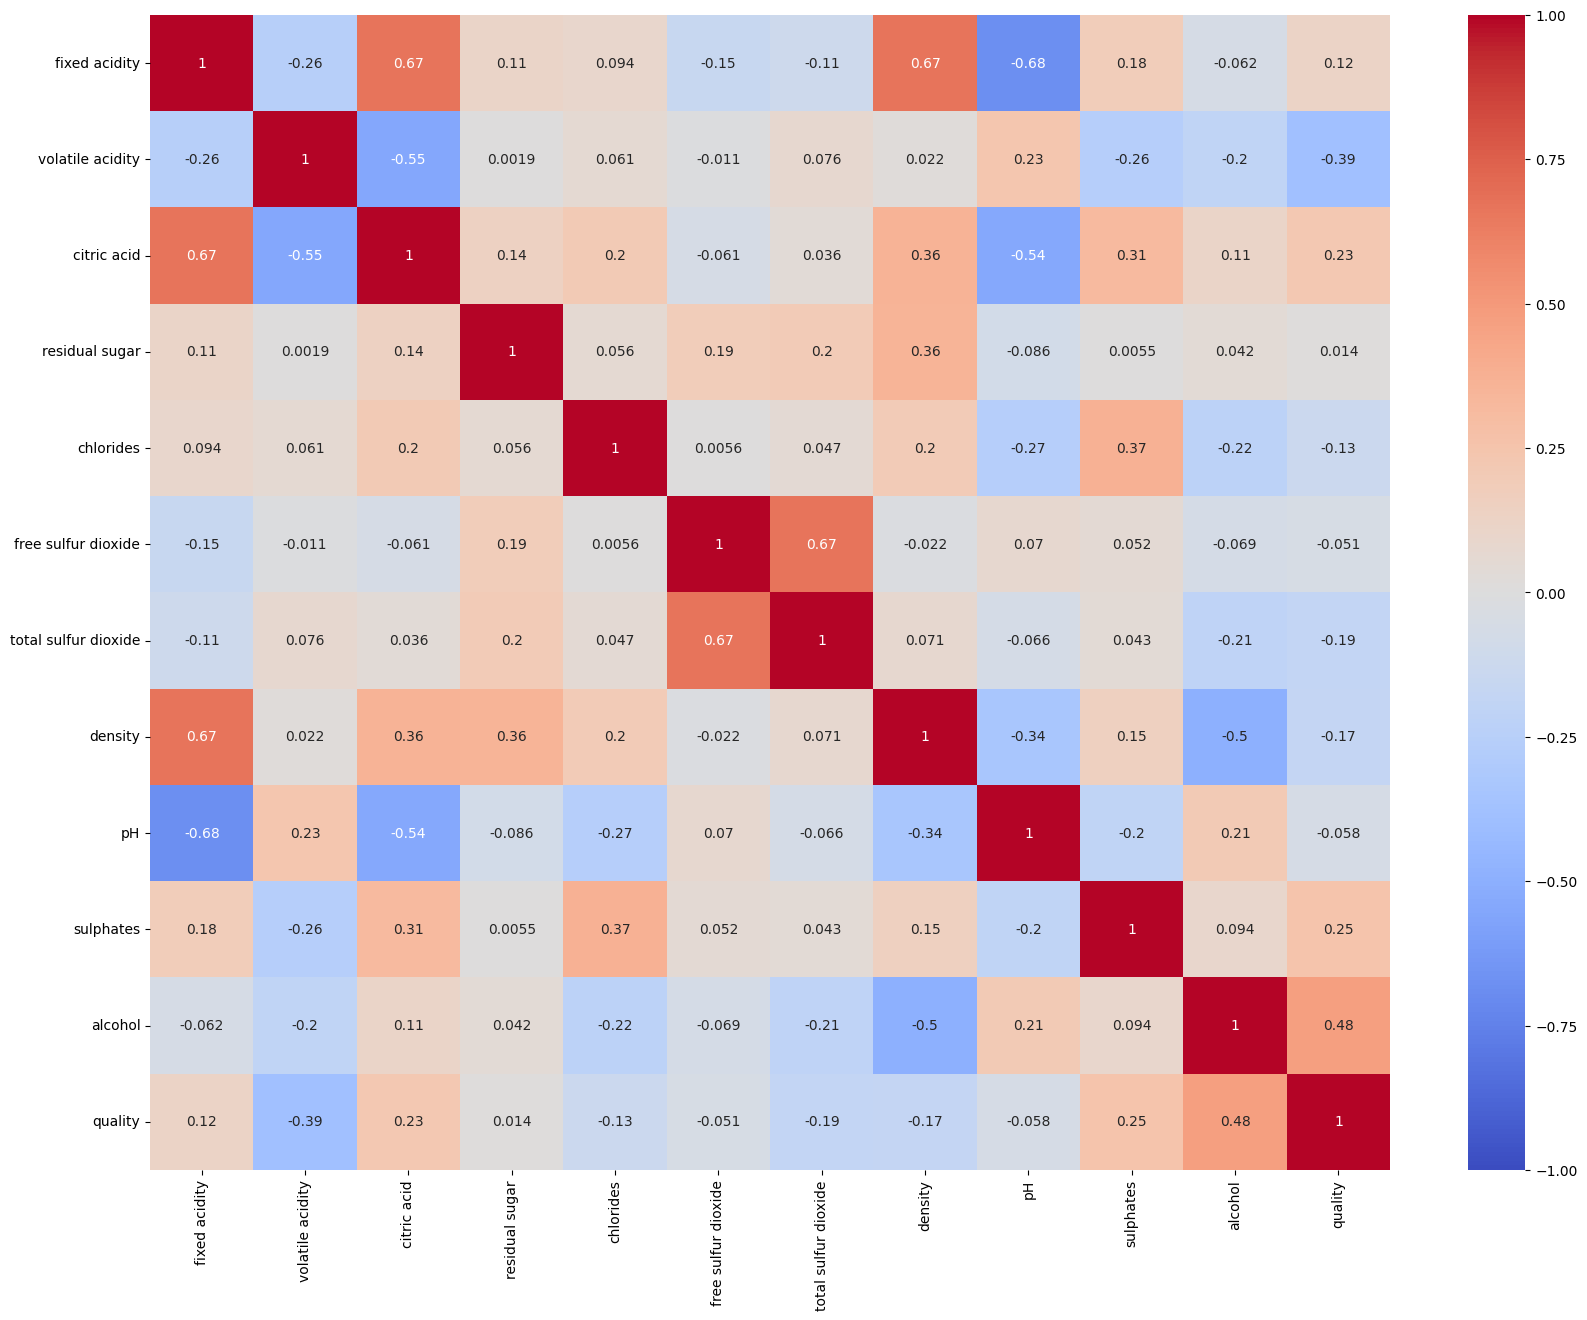

In [ ]:
#Find out Correlated Cols
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), vmin = -1, vmax=1, cmap= 'coolwarm', annot=True)
plt.show

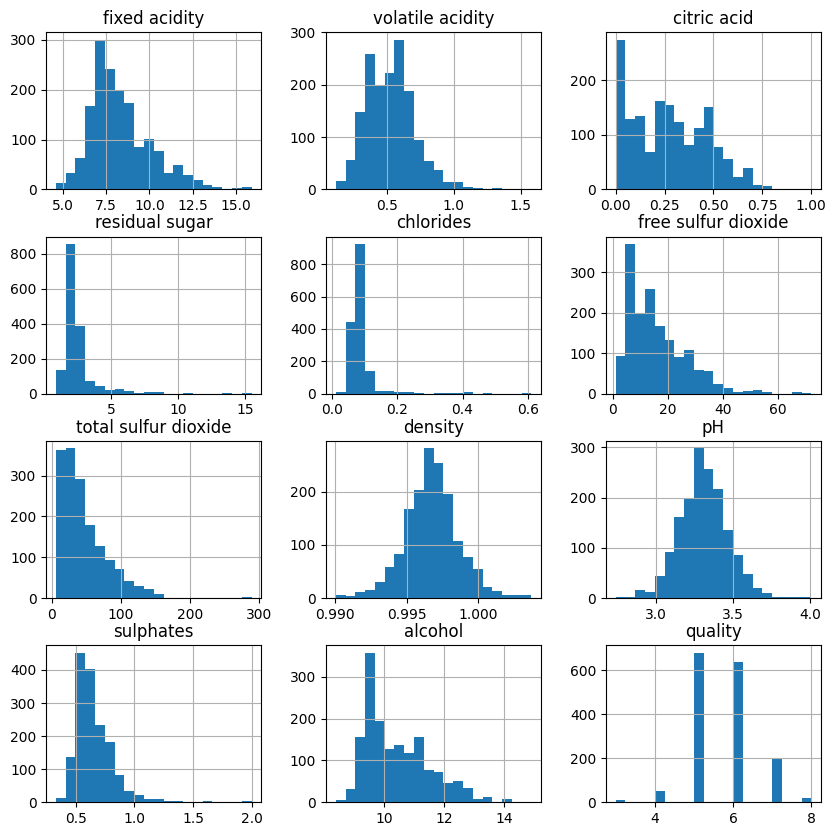

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

## Taking care of missing data

In [ ]:
# Count NaN values in each column
nan_counts = df.isna().sum()
nan_counts

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Splitting the dataset into the Training set and Test set

In [ ]:
# Removing last Col (dependnet value)
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [ ]:
print (x) # x contains the features or the independent variables
print("--------------------------")
print(y) # y contains the dependent variables or the predicted that we want the model to be able to predict

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
--------------------------
[5 5 5 ... 6 5 6]


In [ ]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [ ]:
# creating instance
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 1)

print(x_train)
print("-----------------------")
print(y_train)
print("-----------------------")
print(x_test)
print("-----------------------")
print(y_test)

[[ 7.     0.65   0.02  ...  3.47   0.67   9.5  ]
 [10.2    0.42   0.57  ...  3.04   0.63   9.6  ]
 [ 5.2    0.34   0.    ...  3.68   0.79  14.   ]
 ...
 [ 6.6    0.725  0.09  ...  3.35   0.49  10.8  ]
 [ 7.2    0.63   0.    ...  3.37   0.58   9.   ]
 [ 9.1    0.4    0.5   ...  3.21   0.69  12.5  ]]
-----------------------
[6 5 6 ... 6 6 8]
-----------------------
[[ 8.8   0.41  0.64 ...  3.54  0.66 10.5 ]
 [ 8.7   0.63  0.28 ...  3.26  0.63 10.2 ]
 [10.4   0.34  0.58 ...  3.19  0.7  11.3 ]
 ...
 [ 7.1   0.67  0.   ...  3.44  0.54  9.4 ]
 [ 6.2   0.39  0.43 ...  3.45  0.87 11.2 ]
 [10.9   0.32  0.52 ...  3.28  0.77 11.5 ]]
-----------------------
[5 6 6 6 6 6 6 5 5 5 6 6 6 6 6 5 6 5 5 5 6 6 5 6 6 6 6 6 6 7 6 6 5 6 5 6 5
 7 6 5 6 5 5 6 5 6 5 5 5 6 5 4 7 5 5 6 6 6 5 5 5 6 5 6 5 6 7 6 6 6 5 6 6 6
 5 5 6 6 5 6 5 5 5 6 5 5 5 7 5 6 5 7 5 6 5 5 6 5 3 6 5 5 5 5 5 5 6 6 5 6 7
 5 6 6 5 7 5 5 5 5 4 7 7 5 5 5 6 5 7 7 6 5 7 5 6 7 5 7 6 6 5 6 6 5 6 6 6 5
 6 6 6 6 5 6 5 7 5 6 6 6 8 6 5 5 6 6 4 5 5 6 6

## Feature Scaling

In [ ]:
#to avoid some features being domenated by other features
sc = StandardScaler()

# fit and transform our data using standradistion
x_train[:,:] = sc.fit_transform(x_train[:,:])

x_test[:,:] = sc.transform(x_test[:,:])

print(x_train)
print("--------------------")
print(x_test)

[[-0.73307913  0.6648928  -1.25704443 ...  0.98846046  0.0630946
  -0.87223395]
 [ 1.06774091 -0.62346154  1.52314768 ... -1.7535127  -0.17390392
  -0.77978452]
 [-1.74604041 -1.07158479 -1.35814232 ...  2.32756363  0.77409018
   3.28799021]
 ...
 [-0.95818164  1.08500835 -0.90320179 ...  0.22325865 -1.00339876
   0.32960859]
 [-0.62052788  0.55286199 -1.35814232 ...  0.35079228 -0.47015208
  -1.33448108]
 [ 0.44870902 -0.73549236  1.16930505 ... -0.6694768   0.18159387
   1.90124882]]
--------------------
[[ 0.27988214 -0.67947695  1.87699031 ...  1.43482818  0.00384497
   0.05226031]
 [ 0.22360652  0.55286199  0.05722821 ... -0.35064271 -0.17390392
  -0.22508797]
 [ 1.18029216 -1.07158479  1.57369663 ... -0.79701044  0.2408435
   0.79185571]
 ...
 [-0.67680351  0.77692361 -1.35814232 ...  0.79716001 -0.7071506
  -0.96468337]
 [-1.18328414 -0.79150776  0.81546242 ...  0.86092682  1.24808723
   0.69940629]
 [ 1.4616703  -1.18361561  1.27040294 ... -0.22310908  0.65559092
   0.97675456]

#Model

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(x_test)
print(y_pred)

[5.53665503 5.3757028  6.09994909 5.7271783  6.68879378 5.97168959
 6.19501591 5.0949962  5.78560446 5.16051207 6.18938201 5.3458751
 5.56153145 6.48086642 5.62134947 5.34994932 5.96750537 5.42356559
 5.60694483 5.41711492 5.73487774 6.17637761 5.37367225 6.41905085
 5.44448873 6.30767106 6.09458407 5.68011379 5.30702362 5.83089423
 5.26785033 6.38597599 5.21408686 6.30405167 4.93102342 5.71810813
 5.28395579 5.36258835 6.36476545 5.06531698 6.06709542 5.05867037
 5.20044998 6.14658841 5.12300708 5.7678295  5.10673949 5.2573674
 5.10344829 6.03703173 5.66043957 5.45202212 6.23953602 4.83756366
 5.08496714 5.9723325  6.05798102 5.94793992 5.85472477 5.26350735
 6.32176985 5.18819282 5.28551904 5.53125142 4.63176391 5.42415578
 6.67633306 5.69037958 5.76768184 6.44320399 4.93102342 6.37001882
 5.65578233 5.76375355 5.40209195 5.27725639 6.13449441 5.34311165
 5.72077258 5.80898679 6.02026624 5.12659997 4.99360121 5.53007799
 5.61675584 5.11542299 5.31343704 6.09548683 5.38406092 5.818584

In [ ]:
print(y_pred)
print(y_test)

[5.53665503 5.3757028  6.09994909 5.7271783  6.68879378 5.97168959
 6.19501591 5.0949962  5.78560446 5.16051207 6.18938201 5.3458751
 5.56153145 6.48086642 5.62134947 5.34994932 5.96750537 5.42356559
 5.60694483 5.41711492 5.73487774 6.17637761 5.37367225 6.41905085
 5.44448873 6.30767106 6.09458407 5.68011379 5.30702362 5.83089423
 5.26785033 6.38597599 5.21408686 6.30405167 4.93102342 5.71810813
 5.28395579 5.36258835 6.36476545 5.06531698 6.06709542 5.05867037
 5.20044998 6.14658841 5.12300708 5.7678295  5.10673949 5.2573674
 5.10344829 6.03703173 5.66043957 5.45202212 6.23953602 4.83756366
 5.08496714 5.9723325  6.05798102 5.94793992 5.85472477 5.26350735
 6.32176985 5.18819282 5.28551904 5.53125142 4.63176391 5.42415578
 6.67633306 5.69037958 5.76768184 6.44320399 4.93102342 6.37001882
 5.65578233 5.76375355 5.40209195 5.27725639 6.13449441 5.34311165
 5.72077258 5.80898679 6.02026624 5.12659997 4.99360121 5.53007799
 5.61675584 5.11542299 5.31343704 6.09548683 5.38406092 5.818584

In [ ]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error: (implementation depends on your library)")  # Calculate MAE if needed
print("R-squared:", r2)

Mean Squared Error: 0.38307198158141853
Root Mean Squared Error: 0.618928090800069
Mean Absolute Error: (implementation depends on your library)
R-squared: 0.32664027269869955


SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear" , random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[5 5 6 6 6 6 6 5 6 5 6 5 5 6 6 5 6 5 5 5 5 6 5 6 5 6 6 6 5 5 5 6 5 6 5 6 5
 5 6 5 6 5 5 6 5 5 5 5 5 6 5 5 6 5 5 6 6 6 6 5 6 5 5 5 5 5 6 6 5 6 5 6 5 6
 6 5 6 5 5 6 6 5 5 5 6 5 5 6 5 5 5 6 5 6 6 5 6 5 5 6 5 5 5 5 5 5 6 5 6 6 6
 5 6 5 5 6 5 5 5 5 5 6 6 5 5 5 6 5 6 6 6 5 6 5 6 6 5 6 5 5 5 5 5 5 6 6 5 5
 6 6 5 6 5 5 6 6 6 6 6 5 6 5 5 5 6 6 5 5 5 6 5 6 5 5 6 5 5 5 5 5 6 6 6 5 6
 6 6 5 5 5 6 5 5 5 6 5 5 6 5 5 6 6 6 5 6 6 5 5 6 6 5 6 5 6 5 5 5 5 6 6 5 5
 5 5 6 6 5 6 6 6 5 5 6 6 5 5 6 5 6 6 6 6 6 5 5 6 6 5 5 5 5 5 6 6 6 5 5 5 5
 6 6 5 6 5 5 6 6 5 5 6 5 6 5 6 5 6 5 6 5 5 6 6 6 5 5 6 5 5 5 6 5 6 5 5 6 6
 5 6 5 5 6 6 5 6 5 5 5 6 6 5 5 6 6 6 6 6 5 5 6 6]


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[  0   0   1   0   0   0]
 [  0   0  10   3   0   0]
 [  0   0 109  31   0   0]
 [  0   0  52  82   0   0]
 [  0   0   3  27   0   0]
 [  0   0   0   2   0   0]]
0.596875


Low Accuracy 59.6%

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


c = RandomForestClassifier(n_estimators=10 , criterion="entropy", random_state=0)
c.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_p_3 = c.predict(x_train)

cmm = confusion_matrix(y_train,y_p_3)
print(cmm)
print(accuracy_score(y_train,y_p_3))

[[  8   0   1   0   0   0]
 [  0  39   1   0   0   0]
 [  0   0 539   2   0   0]
 [  0   0   8 496   0   0]
 [  0   0   0   5 164   0]
 [  0   0   0   1   2  13]]
0.9843627834245504


Best Accuracy 98.4%